In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
tf.set_random_seed(0)

In [3]:
M = 2
K = 3
n = 100
N = n * K

In [4]:
X1 = np.random.randn(n, M) + np.array([0,10])
X2 = np.random.randn(n, M) + np.array([5,5])
X3 = np.random.randn(n, M) + np.array([10,0])
Y1 = np.array([[1,0,0] for i in range(n)])
Y2 = np.array([[0,1,0] for i in range(n)])
Y3 = np.array([[0,0,1] for i in range(n)])

In [5]:
X = np.concatenate((X1,X2,X3), axis=0)
Y = np.concatenate((Y1,Y2,Y3), axis=0)

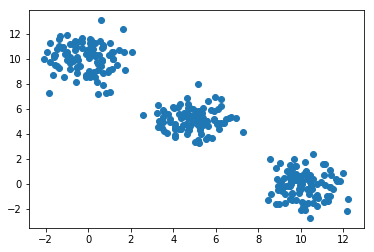

In [6]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [7]:
W = tf.Variable(tf.zeros([M,K]))
b = tf.Variable(tf.zeros([K]))

In [8]:
x = tf.placeholder(tf.float32, shape=[None, M])
t = tf.placeholder(tf.float32, shape=[None, K])
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [9]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(t*tf.log(y),reduction_indices=[1]))

In [10]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

In [11]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(t,1))

In [12]:
batch_size = 50
n_batches = N // batch_size

In [13]:
from sklearn.utils import shuffle

In [14]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [16]:
for epoch in range(20):
    X_, Y_ = shuffle(X, Y)
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end]
        })

In [17]:
X_, Y_ = shuffle(X, Y)
classfied = correct_prediction.eval(session=sess, feed_dict={
    x: X_[0:10],
    t: Y_[0:10]
})
prob = y.eval(session=sess, feed_dict={
    x:X_[0:10]
})

In [19]:
print(classfied)

[ True  True  True  True  True  True  True  True  True  True]


In [20]:
print(prob)

[[  9.69045818e-01   3.09542343e-02   4.79169415e-08]
 [  1.14459516e-02   9.83860373e-01   4.69364552e-03]
 [  2.46581342e-03   9.79708731e-01   1.78255122e-02]
 [  7.53768533e-02   9.15739298e-01   8.88387207e-03]
 [  1.28907862e-09   1.00474209e-02   9.89952624e-01]
 [  9.72905576e-01   2.70940494e-02   2.91974061e-07]
 [  9.93199289e-01   6.80065760e-03   1.65941678e-08]
 [  8.37451592e-02   9.10934865e-01   5.31986495e-03]
 [  1.22682877e-08   9.65444278e-03   9.90345538e-01]
 [  1.69577114e-02   9.42740440e-01   4.03017849e-02]]


In [21]:
print(Y_[0:10])

[[1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]]
